# Customer Segmentation Using K-Means Clustering

This project is a self-study hands-on practice to understand K-Means clustering and one of its many use cases - customer segmentation. Additional notes are included to help understand and follow along easily. 

**Toolkits:** This project will rely heavily on the following python libraries:

-  [**Numpy**](https://numpy.org/) - a fundamental package for scientific computing in Python. It provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.


-  [**Pandas**](https://pandas.pydata.org/) - a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

-  [**Seaborn**](https://seaborn.pydata.org/) - a Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

-  [**Matplotlib**](https://matplotlib.org/) - a comprehensive library for creating static, animated, and interactive visualizations in Python.
 
**Dataset:**

- [**Voice Subscribers Dataset**](https://www.kaggle.com/datasets/olanrej/voice-subscribers) which was created for the purpose of this project. It contains fictional data of mobile telephony subscribers such as age, gender, annual income and spend score. You may download this data into your desktop folder and load the data using the file path as shown in this notebook.

#### 1. Import Libraries and Load Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Import Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data

df = pd.read_csv(r'C:\Users\olanr\OneDrive\Desktop\Projects\Datasets\Voice_Subscribers.csv')
df.head()


,CustomerID,Gender,Age,Annual_Income($'000),Spend_Score (1-100)
0,952011,Female,35,21,35
1,952012,Male,20,21,66
2,952013,Female,68,59,55
3,952014,Male,29,28,82
4,952015,Female,20,16,6


#### 2. Explore the data
The objective of this exploration is to check dimensionality and data types

In [4]:
# Check Dimensionality
df.shape

(200, 5)

In [5]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual_Income($'000)  Spend_Score (1-100)
0        952011  Female   35                    21                   35
1        952012    Male   20                    21                   66
2        952013  Female   68                    59                   55
3        952014    Male   29                    28                   82
4        952015  Female   20                    16                    6
..          ...     ...  ...                   ...                  ...
195      952206  Female   35                   120                   79
196      952207  Female   45                   126                   28
197      952208    Male   32                   126                   74
198      952209    Male   32                   137                   18
199      952210    Male   30                   137                   83

[200 rows x 5 columns]>

In [6]:
# Check for missing values
df.isnull().sum()

CustomerID              0
Gender                  0
Age                     0
Annual_Income($'000)    0
Spend_Score (1-100)     0
dtype: int64

In [7]:
# list the data types for each column
print(df.dtypes)

CustomerID               int64
Gender                  object
Age                      int64
Annual_Income($'000)     int64
Spend_Score (1-100)      int64
dtype: object


#### 3. Feature selection for the model
Feature selection is the process of selecting relevant attributes in a dataset to construct a machine learning model. The objective of a typical machine learning project is to use available information (attributes) to predict an outcome or forecast an occurrence. For instance, a mobile telephony company may use attributes in this dataset - such as Annual Income, Age, Spending Score - to predict the likelihood of a subscriber to churn. In such instance, it is ideal to run a regression and correlation analysis to determine the attributes that are most relevant to predicting the outcome.  

In this project however, we are not exactly predicting a behavioral outcome such as likelihood to churn. Rather, the objective is to group subscribers into clusters based on some identified characteristics (i.e. features). Here, we want the model to look through the Annual_Income and Spend_Score data and group subscribers based on underlying patterns in the data.

First, we create a variable 'X' and assign data in columns 3 (Annual_Income) and 4 (Spend_Score) to it. These two will serve as the features to be used.

In [8]:
X= df.iloc[:, [3,4]].values

To determine the optimal number of customer clusters, the K-means algorithm will be applied to the dataset. K-means is a type of unsupervised machine learning algorithm that splits data into groups based on patterns in the data.
Now, let's apply K-Means algorithm.

In [9]:
# Import Kmeans

from sklearn.cluster import KMeans

# Create an empty list that can be used to store values later.

wcss = []

# Set the maximum number of clusters that can be formed to 10 using "for i in range(1,11)".
# Speify parameter for number of clusters to form using "n_clusters=i" 
# Use k-means++ as initialization method
# Set random_state to "0"


for i in range(1,11): # Setting the maximum number of clusters to 10 
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X) # Recall "X" is the variable containing our features - Annual Income and Spend Score
    wcss.append(kmeans.inertia_) # inertia_ is the formula used to segregate the data points into clusters

C:\Users\olanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\olanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\olanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\olanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Finally, let's visualize and observe the Elbow plot to obtain the optimal value of 'K'. This value is usually considered as location of the 'bend' of the plot which gives it its elbow shape - hence its name.

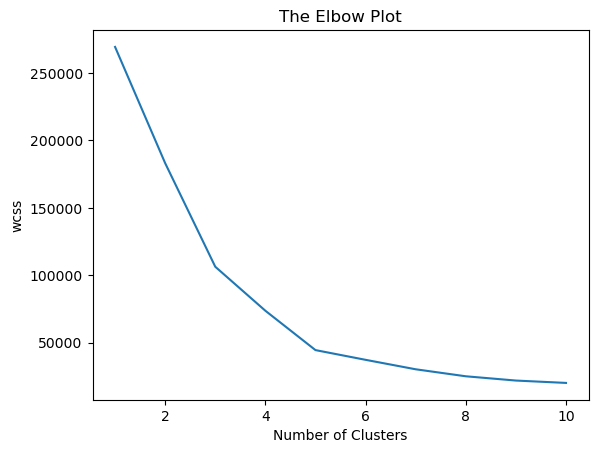

In [10]:
#Visualize the ELBOW plot to obtain the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

A closer look at the plot shows the main bend of the plot occurs at position 5 of the horizontal axis. Therefore, the value of K will be 5 i.e. K = 5.

It is worthy of note however that the value of 'i' will produce the same behavior even if the range were to expand e.g. (1-21). The drawback for higher ranges is that the higher your range, the more difficult it is to identify the elbow point. 

#### 4. Model Build
Now that we have the value of K (K=5), we can insert this value into the kmeans model to create our subscriber clusters.

In [11]:
# Model
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X) # "fit_predict()" for unsupervised learning; "fit_transform()" for supervised learning.

C:\Users\olanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\olanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


To visualize our clusters we will create scatter plots and color-code each cluster.

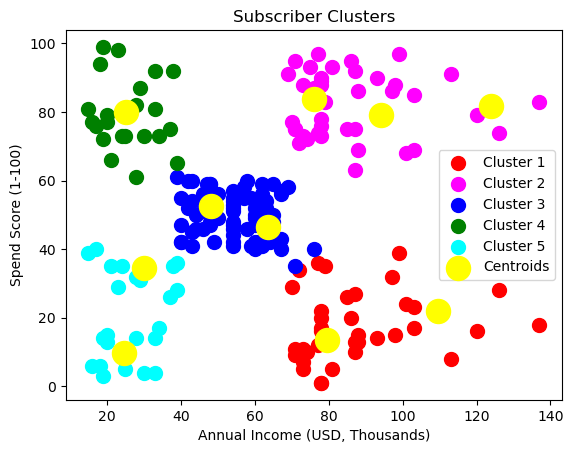

In [12]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'magenta', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Subscriber Clusters')
plt.xlabel('Annual Income (USD, Thousands)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

**Explanation:** Based on the position of each cluster in the plot, the model can be interpreted as follows:

 - Cluster 1 (Red Color) -> High earner but low spender - likely a target segment for upsell activities.
 - Cluster 2 (Magenta Color) ->  High earner, High spender - likely a Tier 1 subscriber segment.
 - Cluster 3 (Blue Color) -> Average earner, Average spender
 - Cluster 4 (Green Color) -> Low earner but High spender
 - Cluster 5 (Cyan Color) -> Low earner, Low spender
 
The equation **"y_kmeans= kmeansmodel.fit_predict(X)"** is the final model that will be deployed into production for use cases such as customer segmentation for a marketing campaign or subscriber base segmentation for tailored customer management.